In [1]:
#math and linear algebra stuff
import numpy as np
import numpy.linalg as la
import scipy as sc
import scipy.ndimage as scim
import scipy.signal as sisp

#Stat
import scipy.stats as sist
import scipy.special as sispec
import scipy.linalg as silin

#plots
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to statistical tests

This small notebook intends to present what is a statistical test, what are the different kind of hypothesis, and associated tests, and show some applications.

## Some definitions

### The null hypothesis, independent and uncorrelated variables

According to [wikipedia](https://en.wikipedia.org/wiki/Null_hypothesis), the null hypothesis states that there is no relationship between two measured phenomena, or no association among groups, and the field of statistics gives precise criteria for rejecting a null hypothesis.

More precisely, still according to wikipedia, there are two ways of testing such hypothesis:

* In the significance testing approach of Ronald Fisher, a null hypothesis is rejected if the observed data are significantly unlikely to have occurred if the null hypothesis were true

* In the hypothesis testing approach of Jerzy Neyman and Egon Pearson, a null hypothesis is contrasted with an alternative hypothesis and the two hypotheses are distinguished on the basis of data, with certain error rates

Statistical inference can be done without a null hypothesis, by specifying a statistical model corresponding to each candidate hypothesis and using model selection techniques to choose the most appropriate model.
The most common selection techniques are based on either Akaike information criterion or Bayes factor.



### Independent and uncorrelated variables

We recall here in a formal way, the definitions of independent and uncorrelated variables.

#### Independent variables
Let $X$ and $Y$ be two random variables, we say that $X$ and $Y$ are independant if $P(X)=P(X|Y)$ and $P(Y)=P(Y|X)$
We also recall the following equalities, related to joint probability $P(X,Y)=P(X|Y)P(Y)=P(X)P(Y|X)$, such that in the case of independence we have: $P(X,Y)=P(X)P(Y)$.

#### Uncorrelated variables
Let $X$ and $Y$ be two random variables,
* $E_X=\mathbb{E}(X)$ and $E_Y=\mathbb{E}(Y)$ their respective expectation (mean).
* $\sigma_X^2=\mathbb{E}((X-E_X)^2)$ and $\sigma_Y^2=\mathbb{E}((Y-E_Y)^2)$ their respective variance.
* $\sigma_{XY}^2=\mathbb{E}((X-E_X)(Y-E_Y))=\mathbb{E}(XY)-E_X E_Y$ the covariance of the pair $(X,Y)$

we say that $X$ and $Y$ are independant if their correlation $\rho_{X,Y}$ is equal to $0$, or equivalently, if their covariance matrix is diagonal.

\begin{align*}
  \rho_{X,Y} &= \frac{\sigma_{XY}^2}{\sqrt{\sigma_{X}^2\sigma_{Y}^2}} \\
  &= \frac{\sum_{i=0}^{n-1} (x_i-E_X)(y_i-E_Y) }{\sqrt{\sum_{i=0}^{n-1} (x_i-E_X)^2 \sum_{i=0}^{n-1}(y_i-E_Y)^2}}
\end{align*}

For the correlation to be zero, we basically need to covariance to be zero, hence $\mathbb{E}(XY)=E_X E_Y$

#### Independant variables are uncorrelated

Let's take a look at the term $\mathbb{E}(XY)$ in the case of continuous independant variables:

\begin{align*}
  \mathbb{E}(XY) &= \int_{\mathbb{R}} P(X=x,Y=y) xy dx dy\\
  &= \int_{\mathbb{R}} P(X=x) x P(Y=y) xy dx dy \qquad \text{because of independence}\\
  &= \int_{\mathbb{R}} P(X=x) x dx \int_{\mathbb{R}} P(X=x) x dx \\
  &= \mathbb{E}(X) \mathbb{E}(Y)
\end{align*}

They are indeed uncorrelated

#### Uncorrelated variables may be dependent

A famous example of dependent but uncorrelated variables is the following one:
Let $X$ be uniformly distributed on the interval $[−1, 1]$ such that:

\begin{align*}
  Y = \begin{cases} −X \qquad & \text{if} \; X \leq 0\\
    X & \text{otherwise} \end{cases}
\end{align*}

One can check that:
* $Y$ is uniformly distributed on [0, 1]
* $\mathbb{E}(X Y|X \leq 0) = \int_{-1}^{0} -x^2 dx = -\frac{1}{3}$
* $\mathbb{E}(X Y|X \geq 0) = \int_{0}^{1} x^2 dx = \frac{1}{3}$
* $\mathbb{E}(X Y) = 0$ because of the law of total expectation


#### Decorrelation / withenning transform

Whitenning transform is a tool that allows to decorrelate a set of samples drawn from a set of random variables of known covariance.
The idea is to make the resulting covariance of the whitenned samples equal to the identity matrix. One can limit itself to a diagonal matrix if it just want to decorrelate samples

Let $X$ be the matrix containing the centered samples (1 sample per column) each one drawn from the same distribution.
The covariance matrix $C$ then writes $C=XX^T$, then the decorrelation matrix $W_D$, and the withenning matrix $W_W$ should verify,

for decorrelation:

\begin{align*}
  W_D X (W_D X)^T &= W_D X X^T W_D^T\\
  &= W_D C W_D^T \\
  &= D
\end{align*}

where $W_D C W_D^T = D$ is a diagonal matrix.
One can use an eigenvalue decomposition of the form $C = Q D Q^T$, or equivalently, thanks to positive definitiveness and spectral theorem: $D = Q^T C Q$ and make the subsequent identification $W_D=Q^T$

for whitenning:
\begin{align*}
  W_W X (W_W X)^T &= W_W X X^T W_W^T \\
  &= W_W C W_W^T \\
  &= I
\end{align*}

where $W_ W C W_W^T = I$ is the identity matrix.
One can start by using the same approach as for decorrelation, ie use use eigen decomposition and compose with $D^{-\frac{1}{2}}$ to obtain identity:
\begin{align*}
  C &= Q D Q^T \\
  D &= Q^T C Q \qquad \text{thanks to posisitve definitiveness and spectral theorem} \\
  D^{-\frac{T}{2}} D D^{-\frac{1}{2}} &= D^{-\frac{T}{2}} Q^T C Q D^{-\frac{1}{2}} \\
  I &= D^{-\frac{T}{2}} Q^T C Q D^{-\frac{1}{2}}
\end{align*}

and simply identify $W_W^T = Q D^{-\frac{1}{2}}$

### Choleski decomposition whitening
Another method is to use a choleski decomposition of the form $QQ^T = A$ where $Q$ is a lower triangular matrix. The process of inverting a triangular matrix for a given vector is a very simple operation sometimes called forward substitution, as seen in the FixedPointIterationsMethods notebook in Gauss Seidel method.

\begin{align*}
  Q Q^T &= C \\
  Q^T &= Q^{-1}C \\
  I &= Q^{-1} C Q^{-T}\\
  I &= Q^{-1} X X^T Q^{-T} \\
  I &= Q^{-1} X (Q^{-1} X)^{T} \\
  W_W X (W_W X)^{T} &= I \\
\end{align*}

And then simply identify $W_W=Q$

### Additional notes on whitening
It might be noticed that if you find a $W_W$ such that the following holds:
\begin{align*}
  W_W X (W_W X)^T &= W_W X X^T W_W^T \\
  &= W_W C W_W^T \\
  &= I
\end{align*}
Then, the property will hold for any $W_W'$ such that $W_W' = A W_W$ with $A$ an arbitrary matrix with unitary property, ie $A^{*}A=I$
There might then be multiple choice for the final whitening matrix, and one have some additional freedom to choose the whitenning transform such that it exhibit different sort of optimality, such as zca like transform for instance, that optimize for average cross-covariance or average cross-correlation between original and transformed data.

More on this in [Optimal whitening and decorrelation](https://arxiv.org/abs/1512.00809)

(-0.3324545346778324,
 1.392189226410916,
 -0.03731627913051425,
 1.1699033607464608)

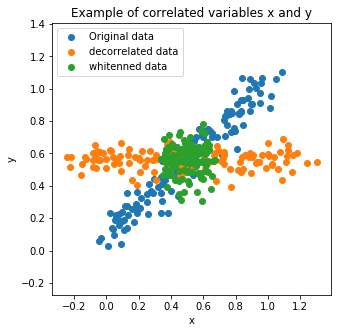

In [29]:
#Let's play along with whithening transform

#Draw samples from 2 correlated random variables
size=128
base=np.linspace(0,1,size)
x=base+0.05*np.random.normal(0,1,size)
y=base+0.05*np.random.normal(1,np.sqrt(2),size)

#Draw covariance estimation, from the matrix containing one sample per column
data=np.array([x,y])
#Substract mean for each variable
mean = data.mean(1).reshape(-1, 1)
data = data - mean
covariance=np.dot(data,data.T)

#Now generate the decorrelation matrix
diag,Q=np.linalg.eig(covariance)
decorrelated=np.dot(Q.T,data)+mean

#and the whitening matrix with choleski decomposition
Q=np.linalg.cholesky(covariance)
assert(np.allclose(np.dot(Q,Q.T)-covariance,0))
whitenned=silin.solve_triangular(Q, data, lower=True)
assert(np.allclose(np.dot(Q, whitenned)-data,0))
whitenned=whitenned+mean

#Draw results
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(x,y,label='Original data')
ax.scatter(decorrelated[0,:],decorrelated[1,:],label='decorrelated data')
ax.scatter(whitenned[0,:],whitenned[1,:],label='whitenned data')
ax.legend()
ax.set_title("Example of correlated variables x and y")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')

## Testing the null hypothesis with different kind of test statistics

There are four main test statistics that can be used in a hypothesis test. Which one to use depends on which statistical test is ran.

A \*-test (here * stands for a placeholder) is any statistical hypothesis test in which the test statistic follows a specific distribution ($\chi^2$, F-distribution, student's distribution) under the null hypothesis.

A test statistic, is usually a formula, that maps some data, generally outputs coming from sampling a random process, to a scalar, called a score.

Here are some example of some Test Statistics:

|Hypothesis Test | Test Statistic | Test Formula | distribution | Null hypothesis example | Comment |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Z-Test | Z-Score | $$\frac{\mu_s - \mu}{\frac{\sigma}{\sqrt{n}}}$$ | normal distribution with $$\mu=0$$,$$\sigma=1$$ | Check if expected values of a quantitative variable between $n$-sample group of mean $\mu_s$ and reference population of mean $\mu$ and variance $\sigma$ differ from each other significantly | $n \geq 30$, otherwise T-Test |
| T-Test | T-Score | $$\frac{\mu_s - \mu}{\frac{\sigma_s}{\sqrt{n}}}$$  | student's distribution, with $$n-1$$ dof | Check if expected values of a quantitative variable between $n$-sample group of mean $\mu_s$ and variance $\sigma_s$ and reference population of mean $\mu$ differ from each other significantly | |
| ANOVA | F-statistic | $$\frac{\frac{\sum_{i=0}^{k-1} n_i(\mu_{i \cdot} - \mu)^2}{k-1}}{ \frac{\sum_{i=0}^{k-1}\sum_{j=0}^{n_i} \left( Y_{ij}-\mu_{i\cdot} \right)^2}{(n-k)}}$$ | F-distribution $$dof_1=k-1$$, $$dof_2=n-k$$ | Check if expected values of a quantitative variable for which we have $n$ samples within $k$ pre-defined groups differ significantly from each other | |
| F-Test | F-statistic | $$\frac{\frac{\sum_{i=0}^{n-1} (f_1(x_i)-y_i)^2-\sum_{i=0}^{n-1} (f_2(x_i)-y_i)^2}{k_2-k_1}}{ \frac{\sum_{i=0}^{n-1} (f_2(x_i)-y_i))^2}{(n-k_2)}}$$ | F-distribution $$dof_1=k_2-k_1$$, $$dof_2=n-k_2$$ | Also, check if there is a significant improvement in terms of explained variance between a candidate model $f_1$ with $k_1$ parameters and a reference model $f_2$ with $k_2$ parameters for data fitting.| |
| Chi-Square Test | Chi-square statistic | $$\sum^k_{i=0}{\frac{\left(x_i-m_i\right)^2}{m_i}}$$ | $\chi^2$ with $k$ dof | test significance of cardinality difference with group classification prediction.
| Chi-Square Test | Chi-square statistic | $$\frac{(n-1)\sigma_{s}^2}{\sigma^2}$$ | $\chi^2$ with $n-1$ dof | Also, variance testing for n-sample group with variance $\sigma_{s}$ and reference population of variance $\sigma$.


## Testing sample mean with Z-test
The following examples comes from [Towards data science blog](https://towardsdatascience.com/inferential-statistics-hypothesis-testing-using-normal-deviate-z-test-c3f5f7647581)

### Hypothesis
Z-test is particularly well suited to assess the significance of the difference of the expectation of a random variable (its mean) between a sample (set of example currently under test) and a reference population.

The null hypothesis in this case would read as follow:
* H0 — The difference in means between sample variable and population mean is a statistical fluctuation.
* H1 — The difference in means between sample BP column and population mean is significant. The difference is too high to be the result of statistical fluctuation

Pre-requisite:
* The number of samples is expected to be >= 30
* The mean and standard deviation of the population should be known

### Computing the z-score
The test formula in this case (the z-score) reads:
\begin{align*}
    z &= \frac{\mu_{sample}-\mu_{population}}{\frac{\sigma_{population}}{\sqrt{n_{sample}}}}
\end{align*}

The numerator is sometimes called SE for standard error.

### Corresponding p-value
The test statistic is now given:  the z-score.
The test distribution here is the normal distribution with zero mean and unit variance.
One can actually compute the p-value for the given sample, and the given hypothesis.
We recall that the p-value or probability value is the probability of obtaining test result at least as extreme or more extreme as the result actually observed during the sample test, assuming that the null hypothesis is correct.

More explicitly, in this case, we want a double sided test where both positive and negative z-score are treated the same way.

Mean population is 100.02, std population is 10.43
Mean sample is 101.26
p value is 0.5127. This is the probability that z-score is more extreme than the measured one in case H0 is true
Samples are likely drawn from the same distributions (fail to reject H0)


Text(0, 0.5, 'Probability')

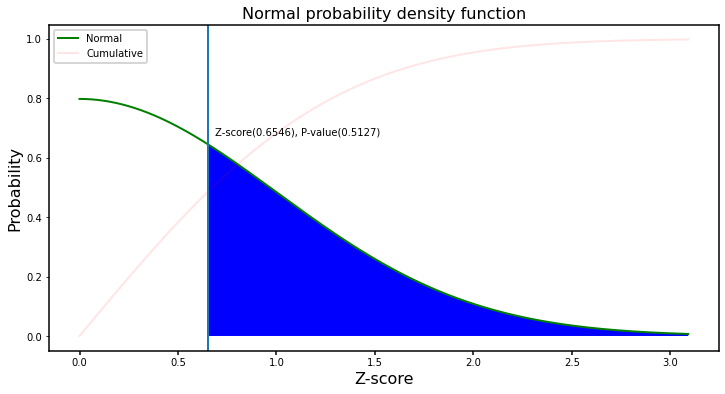

In [7]:
# See interesting details here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

# Apply a Z-test
samples = np.random.normal(100, 10, (30))
population = np.random.normal(100, 10, (3000)) # this is supposed to be a distribution, not empirical dataset

print(f"Mean population is {population.mean():.2f}, std population is {population.std():.2f}")
print(f"Mean sample is {samples.mean():.2f}")

def z_test_deviate(samples, population):
    zscore = abs((samples.mean()-population.mean())/(population.std()/np.sqrt(samples.size)))

    #Define support pdf of normal distribution, covering from 50% to 99.9% cumulative probability
    x = np.linspace(sist.norm.ppf(0.5), sist.norm.ppf(0.999), 1000)
    # We double this as we consider the double sided case
    normpdf = sist.norm.pdf(x)*2
    # We need to play with cdf in order to account for double sided case
    normcdf = 2*(sist.norm.cdf(x)-sist.norm.cdf(x[0]))
    
    #Compute probability that the outcome is coherent with null hypothesis
    test = sist.norm.pdf(zscore)*2
    #Survival function, equivalent to 1-cdf(Z) with better precision
    pval = 2*(sist.norm.sf(zscore)+sist.norm.sf(0))-1
    
    return x, zscore, normpdf, normcdf, test, pval

x, zscore, normpdf, normcdf, test, pval = z_test_deviate(samples, population)

print(f"p value is {pval:.4f}. This is the probability that z-score is more extreme than the measured one in case H0 is true")
if pval > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

#Draw normal pdf
plt.figure(0, figsize=(12,6))
plt.plot(x, normpdf,'g',label='Normal')
plt.plot(x, normcdf,'r', alpha = 0.1, label='Cumulative')
plt.fill_between(x, 0, normpdf, where=x>=zscore, facecolor='blue', interpolate=True)
plt.axvline(x=zscore)
plt.annotate('Z-score({:.4f}), P-value({:.4f})'.format(zscore, pval), xy=(zscore, test), xytext=(zscore*1.05, test*1.05))
plt.legend()
plt.title("Normal probability density function")
plt.xlabel("Z-score")
plt.ylabel("Probability")

## Testing regression quality with F-test
The following examples comes from [Towards data science blog](https://towardsdatascience.com/fisher-test-for-regression-analysis-1e1687867259) and [wikipedia](https://en.wikipedia.org/wiki/F-test).

### Hypothesis
The F-test, when used for regression analysis, lets you compare two competing regression models in their ability to “explain” the variance in the dependent variable. That can be done simply by comparing 

The null hypothesis in this case would read as follow:
* H0: The Null hypothesis: The proposed model with $k_2$ parameters does not explain the variance in the dataset any better than the simpler model with $k_1$ parameters.
* H1: The alternate hypothesis: The proposed model with $k_2$ parameters does a better job (in a statistically significant way) of explaining the variance in the dataset than the model with $k_1$ parameters.

A very important thing to understand is that number of parameters can also in certain context (like generalized linear regression) be understood as number or features (sometimes called regressor or predictors). So sometimes it is worth considering f-test to determine wether a model that makes use of all predictors is better than a model that makes use of only a subsets of the most meaningful predictors. The topic of feature selection goes far beyond the current notebook scope, however we touched upon the subject a bit in the notebook called InformationTheoryOptimization, using in particular a nice example from [scikit-learn](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html).

In our context, the model with more parameters will always be able to fit the data at least as well as the model with fewer parameters. Thus typically model 2 will give a better (i.e. lower error) fit to the data than model 1. But one often wants to determine whether model 2 gives a significantly better fit to the data. One approach to this problem is to use an F-test.



### Computing the F-score

#### For variance analysis
The test formula in this case (the f-score) reads:
\begin{align*}
    f &= \frac{\text{Variance unexplained by model $f_1$, but explained in model $f_2$}}{\text{Variance explained by model $f_2$}} \\
    f &= \frac{\frac{RSS_1-RSS_2}{k_2-k_1}}{\frac{RSS_2}{n-k_2}} \\
    &= \frac{\frac{\sum_{i=0}^{n-1} (f_1(x) - y_{i})^2 - \sum_{i=0}^{n-1} (f_2(x) - y_{i})^2}{k_2-k_1}}{\frac{\sum_{i=0}^{n-1}(f_2(x) - y_{i})^2}{n-k_2}}
\end{align*}

Where:
* $y_0, y_1, \dots, y_{n-1} $ are the actual value to be predicted
* n is the number of training samples
* $\sum_{k=0}^{n-1} (f_1(x_i)-y_i)^2$ is also known as residual sum of squares

The F-statistic formula lets you calculate how much of the variance in the dependent variable, the simpler model is not able to explain as compared to the complex model, expressed as a fraction of the unexplained variance from the complex model.

We should always calculate F-score on two model if they are nested (the second one should be a generalization of the first one). We can also compare multiple model against the simplest default model, which is the "intercept-only model" ie $f_1(x)=\mathbb{E}[y]$ in that case we take $k_1=1$. By default, if nothing is specified, F-test for regression quality analysis is computed against intercept only model.

#### For significance of mean difference between multiple groups (extension of Z-test)
For classification, see anova, we also have an alternative definition:

\begin{align*}
    f &= \frac{\text{between group variability}}{\text{intra group variability}} \\
        &= \frac{\sum_{i=1}^{K} n_{i}(\bar{Y}_{i\cdot} - \bar{Y})^{2}/(K-1)}{\sum_{i=0}^{n-1}\sum_{j=0}^{n_i} \left( Y_{ij}-\mu_{i\cdot} \right)^2/(N-K)}
\end{align*}

where:
* $\bar{Y}_{i\cdot}$ denotes the sample mean in the i-th group
* $n_{i}$ is the number of observations in the i-th group
* $\bar{Y}$ denotes the overall mean of the data
* $K$ denotes the number of groups.
* $Y_{ij}$ is the jth observation in the ith out of $K$ groups
* $N$ is the overall sample size

This F-statistic follows the F-distribution with degrees of freedom $d_{1}=K-1$ and $d_{2}=N-K$ under the null hypothesis.
The statistic will be large if the between-group variability is large relative to the within-group variability, which is unlikely to happen if the population means of the groups all have the same value.

### Corresponding p-value

If we assume that the residual errors from the two models are 
1. independent
2. normally distributed
Which incidentally happen to be requirements of Ordinary Least Squares regression, then it can be seen that the numerator and denominator of the F-statistic formula contain sums of squares of independent, normally distributed random variables.
It can be proved that the sum of squares of k independent, standard normal random variables follow the PDF of the Chi-squared ($\Chi^2$) distribution.
Thus the numerator and denominator of the F-statistic formula can be shown to each obey scaled versions of two chi-squared distributions.
With a little bit of math, it can also be shown that the ratio of two suitably scaled Chi-squared distributed random variables is itself a random variable that follows the [F-distribution](https://en.wikipedia.org/wiki/F-distribution) with parameter $k_2−k_1$ and $n-k_2$.

Here is the definition of this distribiution:

\begin{align*}
    f(x;d_{1},d_{2}) &= \frac{
                                \sqrt{
                                        \frac{(d_1 x)^{d_1} \,\, d_2^{d_2}}
                                             {(d_1 x + d_2)^{d_1+d_2}}
                                      }
                              }{
                                x \, \mathrm{B} \left( \frac{d_1}{2} , \frac{d_2}{2} \right)} \\
                     &= \frac{1}{\left( \frac{d_1}{2} , \frac{d_2}{2} \right)}
                        \left(\frac{d_1}{d_2}\right)^{\frac{d_1}{2}}
                        x^{\frac{d_1}{2}-1}
                        \left( 1 + \frac{d_1}{d_2} \, x \right)^{-\frac{d_1+d_2}{2}}
\end{align*}

With $B$ the Beta function, see [here](https://en.wikipedia.org/wiki/Beta_function) also called the Euler integral of the first kind, which interestingly, can be expression as a function of the $\Gamma$ function:

\begin{align*}
    \mathrm{B}(x,y)= \frac{ \Gamma (x) \, \Gamma (y)}{ \Gamma (x+y) }
\end{align*}


We recall that the p-value or probability value is the probability of obtaining test result at least as extreme or more extreme as the result actually observed during the sample test, assuming that the null hypothesis is correct.


found fscore 14.683710 instead of 14.683710.
found p value 0.000225 instead of 0.000225. This is the probability that f-score is more extreme than the measured one in case H0 is true
The proposed model does significantly explains more variance than the simpler intercept (reject H0)


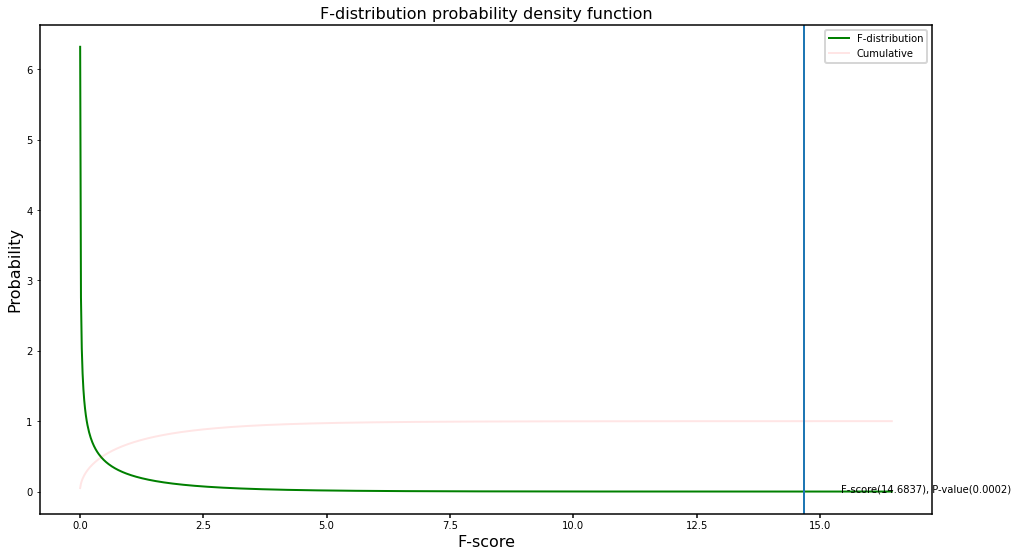

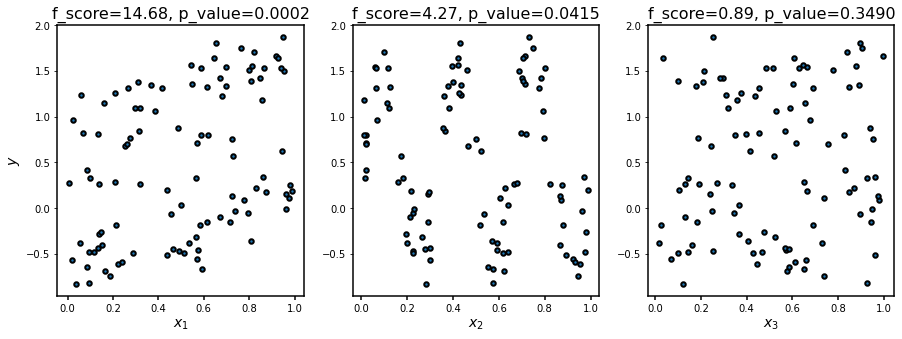

In [67]:
# See interesting details here:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta

# Current example mostly inspired by
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html
from sklearn import linear_model
from sklearn.feature_selection import f_regression

# Apply a F-test on a case where we have 3 features
np.random.seed(0)
X = np.random.rand(100, 3)
y = 1*X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(X.shape[0])

# Default model
intercept = np.ones_like(y)*y.mean()

# Generate 1-feature model on the fly
def get_linear(features, labels):
    if len(features.shape) < 2:
        features = features.reshape(-1,1)
    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)
    # Train the model
    regr.fit(features, labels)
    # Make predictions, fit_intercept adds a parameter
    return regr.predict(features), len(regr.coef_)+1


def f_test_deviate(restrict_model, restrict_dof, candidate_model, candidate_dof, y):
    RSS1 = np.linalg.norm(restrict_model-y)**2
    RSS2 = np.linalg.norm(candidate_model-y)**2
    k1 = restrict_dof
    k2 = candidate_dof
    n = len(y)
    
    fscore = ((RSS1-RSS2)/(k2-k1))/(RSS2/(n-k2))

    #Define support pdf of F-distribution, covering from 50% to 99.9% cumulative probability
    x = np.linspace(sist.f.ppf(0.05,k2-k1,n-k2), sist.f.ppf(0.9999,k2-k1,n-k2), 1000)
    fpdf = sist.f.pdf(x,k2-k1,n-k2)
    fcdf = sist.f.cdf(x,k2-k1,n-k2)
    
    #Compute probability that the outcome is coherent with null hypothesis
    test = sist.f.pdf(fscore,k2-k1,n-k2)
    
    #Survival function, equivalent to 1-cdf(F) with better precision
    pval = sist.f.sf(fscore,k2-k1,n-k2)
    
    return x, fscore, fpdf, fcdf, test, pval


# Simply check f-score for first feature
model, dof = get_linear(X[:,0],y)
x, fscore, fpdf, fcdf, test, pval = f_test_deviate(intercept, 1, model, dof, y)
# Cross check with scikit learn version
f_score, p_val = f_regression(X, y, center=True)

print(f"found fscore {fscore:.6f} instead of {f_score[0]:.6f}.")
print(f"found p value {pval:.6f} instead of {p_val[0]:.6f}. This is the probability that f-score is more extreme than the measured one in case H0 is true")

if pval > 0.05:
    print('The proposed model does not explain the variance any better than the simpler intercept. (fail to reject H0)')
else:
    print('The proposed model does significantly explains more variance than the simpler intercept (reject H0)')

#Draw normal pdf
fig, ax = plt.subplots(1, figsize=(16,9))
ax.plot(x, fpdf,'g',label='F-distribution')
ax.plot(x, fcdf,'r', alpha = 0.1, label='Cumulative')
ax.fill_between(x, 0, fpdf, where=x>=fscore, facecolor='blue', interpolate=True)
ax.axvline(x=fscore)
ax.annotate('F-score({:.4f}), P-value({:.4f})'.format(fscore, pval), xy=(fscore, test), xytext=(fscore*1.05, test*1.05))
ax.legend()
ax.set_title("F-distribution probability density function")
ax.set_xlabel("F-score")
ax.set_ylabel("Probability")

# Show data
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for i in range(X.shape[1]):
    ax[i].scatter(X[:, i], y, edgecolor='black', s=20)
    ax[i].set_xlabel(f"$x_{i + 1}$", fontsize=14)
    if i == 0:
        ax[i].set_ylabel(f"$y$", fontsize=14)
    ax[i].set_title(f"f_score={f_score[i]:.2f}, p_value={p_val[i]:.4f}", fontsize=16)


## Testing distribution discrepancy with the Chi squared test

### Introduction - Field of application

Test statistics that follow a chi-squared distribution arise from an assumption of independent normally distributed data, which is valid in many cases due to the central limit theorem

### Example: multinomial distribution (Independent experiments, discrete exclusive outcome)

Let's take an example from an information theory background, we have a channel that generates a sequence of messages, each one containing one symbol, where only $k=4$ symbol $s_0, s_1, \dots, s_{k-1}$ exist.
If we do an experiment with $n$ messages, we can define $k$ values $x_0, x_1 \dots, x_{k-1}$ standing for the actual cardinality of each symbol in the output of the process, it writes as follow: $x_i=\sum_{j=0}^{n-1} \delta(y_{j}=s_i)$ where $y_{j}$ is the $j^{\text{th}}$ output of the random process:

Listening to this channel for $n=100$ message, we did the following statistics:

|Symbol $s_0$|Symbol $s_1$|Symbol $s_2$|Symbol $s_3$|
|--------|--------|--------|--------|
| 19 hits| 29 hits| 24 hits| 28 hits|

We suppose here that null hypothesis is valid if all symbols have equiprobability, ie $P(\delta(y_{j}=s_i)=P(\delta(s_i)=\frac{1}{k} \forall (j,i) \in \mathbb{N},{0,1,\dots,k-1}$.
If the null hypothesis is true, we should have, in law: $P(y_{j}=s_1)=P(y_{j}=s_2)=P(y_{j}=s_3)=P(y_{j}=s_4)=\frac{1}{4} \forall j$.

One can notice that we can change the null hypothesis towards a more generic version of the multinomial law where the $P(y_{j}=s_i)$ are not equal for all values of $i$. For instance, we can declare a non naive multinomial distribution.

#### A bit more about likelihood of multinomial distributions
Multinomial distribution generalizes the Bernouilli distribution from a sample space of 2 events to an arbitrary high number of outcomes.

In the framework of our example, we would still have the following constraints: $\sum _{i=1}^{k}x_{i}=n$ and $\sum_{i=1}^{k}P_{s_i}=1$

The probability of a specific outcome would be expressed as:
\begin{align*}
    P(x_{1}=n_{1},\dots, x_{k}=n_{k})= \frac{n!}{n_{1}! \dots n_{k}!} P_{s_1}^{n_{1}} \dots P_{s_k}^{n_{k}}
\end{align*}

Interestingly, each of the $x_{i}$ variables is still a bernouilli variable with expectation $\mathbb{E}(x_i)=nP_{s_i}$ and variance $\mathbb{E}[(x_i-\mathbb{E}(x_i))^2]=nP_{s_i}(1-P_{s_i})$

The expression of the probability for one outcome, given a known model, is used in various domains of engineering within a bayesian framework, as one is often interested in finding the set of parameters for a distribution that gives the maximum likelihood.
The role of the Chi square might, at first sight seem similar but it is actually a bit different:

* Numerical value might be very different as their meaning is completely different. Chi2 statistics will indicate the probability of null hypothesis to be true, one will probably reject null hypothesis if this values is lower than 0.05 for instance. Likelihood is the probability that the null hypothesis model gave the said output, this probability can be arbitrary low, but it can still be the highest possible for all considered models.

One must also notice that in practical setting where we have quite a lot of sample, the multinomial probability expression might be numerically unstable as we have a product between number growing exponentially high and number growing exponentially low in magnitude.

In [69]:
def likelihood_multinomial(hits):
    k=hits.size
    n=hits.sum()
    equi_prob=1/k
    fact_part = sispec.factorial(n)/np.prod(sispec.factorial(hits))
    prod_part = np.power(equi_prob,n)
    return fact_part*prod_part

#### Expression of Chi square pdf

We call $E_i, i \in 0,1,2,k-1$ the expectation of the variable $x_i: E_i = \mathbb{E}(x_i)$
Then pearson showed, that, asympotically, when $n \rightarrow +\infty$ the random variable $Q$ follows a $\chi^2$ (Chi squared) law with $k-1$ degrees of freedom:

\begin{align*}
 Q = &\sum_{i=0}^{k-1} \frac{(x_i-E_i)^2}{E_i} \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2+E_i^2-2x_i E_i}{E_i} \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2}{E_i} + \sum_{i=0}^{k-1} \frac{E_i^2}{E_i}  -2 \sum_{i=0}^{k-1} \frac{x_i E_i}{E_i} \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2}{E_i} + n - 2 n \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2}{E_i} - n
\end{align*}

We recall that the $\chi^2$ probability density function, with $k-1$ degrees of freedom writes:

\begin{align*}
 \chi^2(x,\,k)= \begin{cases}{
   \frac{ x^{\frac{k}{2}-1} e^{-\frac{x}{2}}}
     {2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)}} , \quad & \text{if } x > 0\\
     0 & \text{otherwise}
   \end{cases}
\end{align*}

Let see how this apply to our numerical case, it should be notices that one usually reject null hypothesis when Chi-squared test outcome is below 5%:

#### Chi square test and p values

From [wikipedia](https://en.wikipedia.org/wiki/P-value) the p-value is defined as the probability, under the null hypothesis $H$ (at times denoted $H_{0}$ as opposed to $H_a$ denoting the alternative hypothesis) about the unknown distribution $F$ of the random variable $X$, for the variable to be observed as a value equal to or more extreme than the value observed.
If $x$ is the observed value, then depending on how we interpret it, the "equal to or more extreme than what was actually observed" can mean $\{X\geq x\}$ (right-tail event), $\{X\leq x\}$ (left-tail event) or the event giving the smallest probability among $\{X\leq x\}$ and $\{X\geq x\}$ (double-tailed event). Thus, the p-value is given by:
* $P(X\geq x|H)$ for right tail event,
* $P(X\leq x|H)$ for left tail event,
* $2\min\{P(X\leq x|H),P(X\geq x|H)\}$ for double tail event.

The received outcome [19 29 24 28] is likely to be drown from equiprobability multinomial. (fail to reject H0)


Text(0, 0.5, 'Probability')

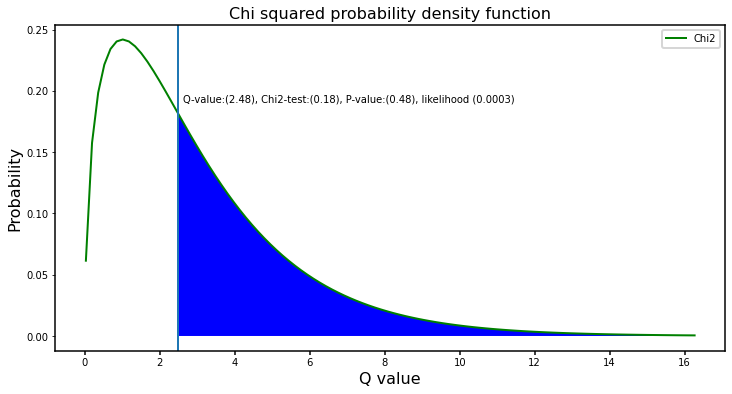

In [74]:
# Apply a simple Chi-squared test
#hist=np.array([9, 39, 24, 28])
# Quite interesting to also try with
hist=np.array([19, 29, 24, 28])
#hist=np.array([25, 25, 25, 25])

def chi_square_multinomial(hits):
    k=hits.size
    n=hits.sum()
    equi_prob=1/k
    expectations=np.repeat(equi_prob*n,k)
    Q = np.sum((hits**2)/expectations)-n

    #Define pdf of chi squared, covering from 0.1% to 99.9% cumulative
    x = np.linspace(sist.chi2.ppf(0.001, k-1),
      sist.chi2.ppf(0.999, k-1), 100)
    # no need to take into account continuity correction
    chi2pdf = sist.chi2.pdf(x, k-1)
    
    #Compute probability that the outcome is coherent with null hypothesis
    test = sist.chi2.pdf(Q, k-1)
    pval = sist.chi2.sf(Q, k-1) #equivalent to 1-cdf(Q,k-1) with better precision
    
    return x, Q, chi2pdf, test, pval

x, Q, chi2pdf, test, pval = chi_square_multinomial(hist)

if pval > 0.05:
    print(f'The received outcome {hist} is likely to be drown from equiprobability multinomial. (fail to reject H0)')
else:
    print(f'The received outcome {hist} is likely not drown from equiprobability multinomial (reject H0)')


#Draw Chi squared pdf
plt.figure(0, figsize=(12,6))
plt.plot(x,chi2pdf,'g',label='Chi2')
plt.fill_between(x, 0, chi2pdf, where=x>=Q, facecolor='blue', interpolate=True)
plt.axvline(x=Q)
plt.annotate('Q-value:({:.2f}), Chi2-test:({:.2f}), P-value:({:.2f}), likelihood ({:.4f})'.format(Q, test, pval, likelihood_multinomial(hist)), xy=(Q, test), xytext=(Q*1.05, test*1.05))
plt.legend()
plt.title("Chi squared probability density function")
plt.xlabel("Q value")
plt.ylabel("Probability")

##### Likelihood and statistical test
We thought it would be nice to take an even more simple example to vizualize the behaviour of likelihood versus Chi2 test for a coin toss (binomial) problem.
In order to setup statistical hypothesis testing on binomial model, which is inherently discrete, with Chi square distribution that assumes continuous normality, one needs to use central-limit theorem and setup [continuity correction](https://www.statisticshowto.datasciencecentral.com/what-is-the-continuity-correction-factor/)

The continuity correction rules reads as follow:
* If $P(X=n)$ use $P(n – 0.5 < X < n + 0.5)$
* If $P(X > n)$ use $P(X > n + 0.5)$
* If $P(X \leq n)$ use $P(X < n + 0.5)$
* If $P (X < n)$ use $P(X < n – 0.5)$
* If $P(X \geq n)$ use $P(X > n – 0.5)$

For the $P(X=n)$ case for instance, we'll need the cumulative function.

Text(0, 0.5, 'binomial likelihood for unbiased hypothesis')

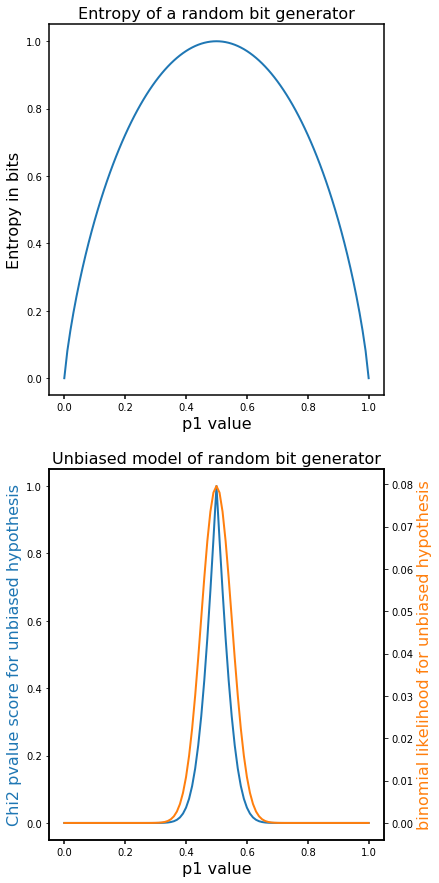

In [75]:
# n coin toss per experiments, 101 experiments, x1 is the number of times face 1 of coin was found in each of the experiment
n=100
k=2
x1=np.arange(0,101)
x2=n-x1
p1=x1/n
p2=x2/n
assert np.allclose(p1, 1-p2)

#histogram of face1/face2 for all experiments
hists = [np.array([el1,el2]) for el1, el2 in zip(x1, x2)]

#Handle the infinite value of log in 0, so that it returns 0
def SafeLog2( v ):
    r=v.copy()
    r[v!=0]=np.log2(v[v!=0])
    return r

#Entropy of a Bernouilli distribution with probability p
def BernoulliEntropy( p ):
    return -( p*SafeLog2(p)+(1-p)*SafeLog2(1-p) )

#entropy functions of p1
entropy = BernoulliEntropy(p1)
#plot likelihood for each experiment
like = np.array(list(map(likelihood_multinomial, hists)))
#plot pvalue for each experiment
pvalue = np.array([t for _, _, _, _, t in map(chi_square_multinomial, hists)])

#Fancy stuff
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
#f.set_figwidth(15)

ax[0].plot(p1, entropy)
ax[0].set_title('Entropy of a random bit generator')
ax[0].set_xlabel('p1 value')
ax[0].set_ylabel('Entropy in bits')

color = 'tab:blue'
ax[1].plot(p1, pvalue, color=color)
ax[1].set_title('Unbiased model of random bit generator')
ax[1].set_xlabel('p1 value')
ax[1].set_ylabel('Chi2 pvalue score for unbiased hypothesis', color=color)

ax2 = ax[1].twinx()
color = 'tab:orange'
ax2.plot(p1, like, color=color)
ax2.set_ylabel('binomial likelihood for unbiased hypothesis', color=color)
#print(chi_square_multinomial(np.array([1e3, 1e3-1]))[3])

#### $\chi^2$ test for variance testing

Instead of checking for the null hypothesis alone, we can check for a given variance hypothesis.
For instance we can check a set of $n$ samples $s$ with variance estimation $\sigma_{s}^2$ against a reference normal distribution of known variance $\sigma^2$, with this simple formula:

\begin{align*}
  Q = \frac{(n-1)\sigma_{s}^2}{\sigma^2}
\end{align*}

The degrees of freedom chosen for the $\chi^2$ probability distribution function is $n-1$
We tried to use this type of variance testing within the AstroIntro notebook.

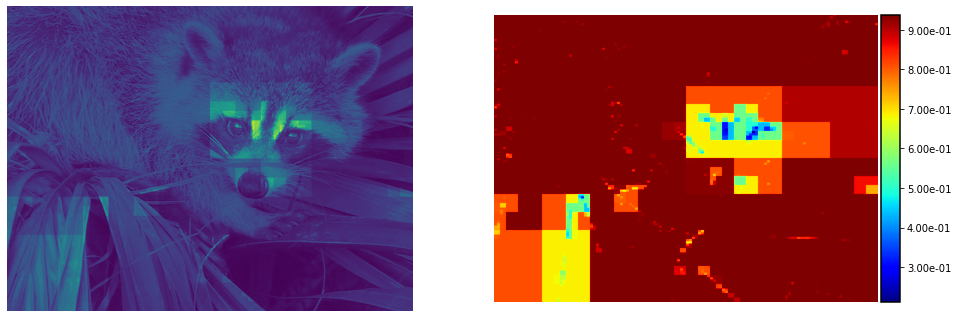

In [78]:
# A pretty cool application: gloabl vs multiscale variance statistical test
def spliti(size):
    """
        returns split index given a size
    """
    return size//2

def dyadic_index_generator(start_index, end_index, min_ok_size):
    size = end_index-start_index
    if size<2*min_ok_size:
        yield [start_index, end_index]
    else:
        yield from dyadic_index_generator(start_index, start_index+spliti(size),
                                   min_ok_size)
        yield from dyadic_index_generator(start_index+spliti(size), end_index,
                                   min_ok_size)

def patch_index_generator(shape, min_ok_size):
    #Iterate over x axis
    for start_x, end_x in dyadic_index_generator(0, shape[0], min_ok_size):
        # iterate over y axis
        for start_y, end_y in dyadic_index_generator(0, shape[1], min_ok_size):
            yield [start_x, end_x, start_y, end_y]

def variance_test(global_variance, local_vector):
    n = len(local_vector)
    q_value = ((n-1)*local_vector.var())/global_variance
    return sist.chi2.sf(q_value, n-1)

def multiscale_variance_analysis(image):
    # The very first task is to check the global image variance
    global_variance = image.var()

    # Next task is to decompose the image in dyadic scale
    # We want to perform the analysis until we reach a patch size of minimum
    # 4x4 pixels
    shape = image.shape
    histogram_patch_size = []
    histogram_freq_problem = []
    max_freq = 0
    max_freq_image = np.zeros_like(image, dtype=np.float32)
    total_nb_image = 0
    while min(shape)>=4:
        image_to_show = image.astype(np.float32)
        min_ok_size = min(shape)
        histogram_patch_size.append(min_ok_size)
        histogram_freq_problem.append(0)
        total_nb_patch = 0
        for idx in patch_index_generator(image.shape, min_ok_size):
            patch = image[idx[0]:idx[1],idx[2]:idx[3]]
            p_value = variance_test(global_variance, patch.flatten())
            #image_to_show[idx[0]:idx[1],idx[2]:idx[3]] *= max(0.5, p_value>0.05)
            #image_to_show[idx[0]:idx[1],idx[2]:idx[3]] *= (1.5-p_value)
            max_freq_image[idx[0]:idx[1],idx[2]:idx[3]] += p_value
            if p_value < 0.05:
                histogram_freq_problem[-1]+=1
            total_nb_patch += 1
        histogram_freq_problem[-1]/=total_nb_patch
        if histogram_freq_problem[-1]>max_freq:
            max_freq=histogram_freq_problem[-1]
            #max_freq_image = image_to_show
        shape = tuple(np.array(shape)//2)
        total_nb_image += 1

    fig, ax = plt.subplots(1,2, figsize=(16,9))
    ax[0].imshow((1.25-(max_freq_image/total_nb_image))*image)
    ax[0].axis('off')
    heatmap = ax[1].imshow(max_freq_image/total_nb_image, cmap='jet')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(heatmap, format=FormatStrFormatter('%.2e'), cax=cax)
    ax[1].axis('off')
    plt.show()

import scipy.misc as misc
im = misc.face()[:,:,0]
multiscale_variance_analysis(im)

### Outlier detection on univariate dataset with Generalized Extreme Studentized deviate
From [this statistical handbook](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm) and [this library](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.outliers_gesd/) as well as [this video](https://www.youtube.com/watch?v=KGWbbAUcC0I).

The generalized (extreme Studentized deviate) ESD test (Rosner 1983) is used to detect one or more outliers in a univariate data set that follows an approximately normal distribution.
The primary limitation of the Grubbs test and the Tietjen-Moore test is that the suspected number of outliers, k, must be specified exactly. If k is not specified correctly, this can distort the conclusions of these tests. On the other hand, the generalized ESD test (Rosner 1983) only requires that an upper bound for the suspected number of outliers be specified.

**Definition**: Given the upper bound, r, the generalized ESD test essentially performs r separate tests: a test for one outlier, a test for two outliers, and so on up to r outliers.

#### Test statistics and formula
Given the upper bound, r, the generalized ESD test essentially performs r separate Grubbs tests: a test for one outlier, a test for two outliers, and so on up to r outliers.
The generalized ESD test is defined for the hypothesis:
* H_0:	There are no outliers in the data set
* Ha:	There are up to r outliers in the data set

##### Test Statistic:
Compute the Grubbs statistics: $R_i = \frac{max_i |y_i-\mu|}{\sigma}$
Where
* $\mu$ is the samples mean
* $\sigma$ is the samples standard deviation

Remove the observation that maximizes $|x_i-\mu|$ and then recompute the above statistic with $n - 1$ observations. Repeat this process until r observations have been removed. This results in the r test statistics $R_1, R_2, ..., R_r$.

##### Test distribution
Corresponding to the r test statistics, compute the following r critical values:
\begin{align*}
  \lambda_i = \frac{(n−i)t_{p,n−i−1}}{\sqrt{(n−i−1+t^2_{p,n−i−1})(n−i+1)}} \; i=1,2, \dots ,r
\end{align*}

where
* $t_{p,k}$ is the 100p percentage point from the student distribution with k degrees of freedom
* $p=1−\frac{\alpha}{2(n−i+1)}$
* $\alpha$ is the level of significance

The number of outliers is determined by finding the largest i such that $R_i > \lambda_i$.

Simulation studies by Rosner indicate that this critical value approximation is very accurate for $n \geq 25$ and reasonably accurate for $n \geq 15$.

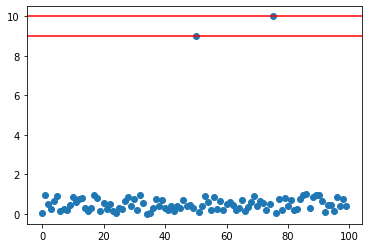

In [7]:
# Now the example, random 1-dimensional signal
size = 100
x = np.arange(size)
y = np.random.random(size)
y[size//2] = 9
y[3*size//4] = 10
plt.scatter(x,y)

def get_Ri(y):
    """
        This is basically Grubbs statistics
    """
    sigma = np.std(y)
    mu = np.mean(y)
    abs_val_minus_avg = abs(y - mu)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Ri = max_of_deviations/ sigma
    return Ri, max_ind

def get_lambda_i(n_m_i, alpha):
    p = 1 - alpha / (2 * (n_m_i+1))
    t_pk = sist.t.ppf(p, n_m_i-1)
    numerator = (n_m_i - 1) * np.abs(t_pk)
    denominator = np.sqrt((n_m_i-1+t_pk**2)*(n_m_i+1))
    lambda_i = numerator / denominator
    return lambda_i

def gesd_test(input_series, alpha, max_outliers):
    n = len(input_series)
    outliers = []
    i_s = []
    for i in range(max_outliers):
        n_m_i = n-i
        lambda_i = get_lambda_i(n_m_i, alpha)
        Ri, furthest_index = get_Ri(input_series)
        outliers.append(input_series[furthest_index])
        if Ri > lambda_i:
            i_s.append(i)
            input_series = np.delete(input_series, furthest_index)
        else:
            i_s.append(-1)
    nb_outliers = max(i_s)+1
    if nb_outliers > 0:
        outliers = outliers[:nb_outliers]
    else:
        outliers = []
    return outliers

outliers = gesd_test(y, alpha=0.05, max_outliers=len(y)//10)
for outlier in outliers:
    plt.axhline(y=outlier, color='r', linestyle='-')


### Outlier detection on gaussian multivariate dataset with robust covariance estimation
GESD does not trivially extends to multivariate dataset. One could potentially use Mahalanobis distance in the Grubb test, but I am not sure whether the statistical interpretation stays the same.
Another, problematic issue with GESD is the length of the search in $\mathcal{O}(n)$ over the samples.

It looks like in the field of multivariate gaussian density estimation / outlier detection, a method of choice for the ML praticioner seems to be a the fast and robust covariance estimation method through minimum covariance determinant or MCD.

An implementation of this method can be found here:
https://scikit-learn.org/stable/modules/covariance.html#robust-covariance-estimation

The original paper can be found here:
https://www.researchgate.net/publication/2298225_A_Fast_Algorithm_for_the_Minimum_Covariance_Determinant_Estimator

We hereby reproduce the example from: https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py

In [2]:
n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [3]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[3.34127385 0.14491485]
 [0.14491485 1.74231886]]
MLE:
[[3.69970047 0.12685778]
 [0.12685778 6.65253363]]


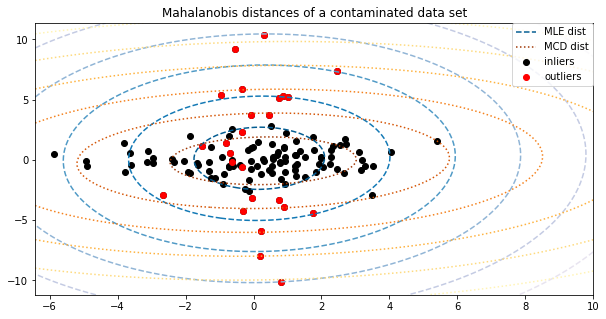

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1],
                         color='black', label='inliers')
outlier_plot = ax.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                          color='red', label='outliers')
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(xx, yy, np.sqrt(mahal_emp_cov),
                              cmap=plt.cm.PuBu_r, linestyles='dashed')
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# Add legend
ax.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
          inlier_plot, outlier_plot],
          ['MLE dist', 'MCD dist', 'inliers', 'outliers'],
          loc="upper right", borderaxespad=0)

Finally, we highlight the ability of MCD based Mahalanobis distances to distinguish outliers. We take the cubic root of the Mahalanobis distances, yielding approximately normal distributions (as suggested by Wilson and Hilferty 2), then plot the values of inlier and outlier samples with boxplots. The distribution of outlier samples is more separated from the distribution of inlier samples for robust MCD based Mahalanobis distances.

Text(0.5, 1.0, 'Using robust estimates\n(Minimum Covariance Determinant)')

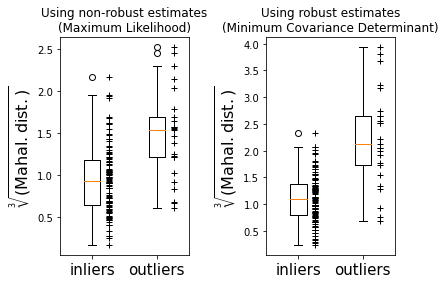

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.6)

# Calculate cubic root of MLE Mahalanobis distances for samples
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
# Plot boxplots
ax1.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
# Plot individual samples
ax1.plot(np.full(n_samples - n_outliers, 1.26), emp_mahal[:-n_outliers],
         '+k', markeredgewidth=1)
ax1.plot(np.full(n_outliers, 2.26), emp_mahal[-n_outliers:],
         '+k', markeredgewidth=1)
ax1.axes.set_xticklabels(('inliers', 'outliers'), size=15)
ax1.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax1.set_title("Using non-robust estimates\n(Maximum Likelihood)")

# Calculate cubic root of MCD Mahalanobis distances for samples
robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
# Plot boxplots
ax2.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
            widths=.25)
# Plot individual samples
ax2.plot(np.full(n_samples - n_outliers, 1.26), robust_mahal[:-n_outliers],
         '+k', markeredgewidth=1)
ax2.plot(np.full(n_outliers, 2.26), robust_mahal[-n_outliers:],
         '+k', markeredgewidth=1)
ax2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
ax2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax2.set_title("Using robust estimates\n(Minimum Covariance Determinant)")

## Correlation significance analysis for time series testing


### Portmanteau test for autocorrelation against null hypothesis

Portmanteau test for autocorrelation is particularly well suited to analyze discrete time series, lets consider $s$ a time serie of length $n$.

Here again, we consider two hypothesis, $H_0$ being the null hypothesis, and $H_a$ being that the data are not independantly distributed, but instead there is a temporal correlation.

To setup such method, we start by defining the sample autocorrelation $\hat{\rho_k}$ of signal $s$ at lag $k$, that uses $E_s$ the expectation (mean) of $s$: $E_s=\mathbb{E}(s)$:

\begin{align*}
  \hat{\rho_k} &= \frac{ \frac{1}{n-k} \sum_{i=0}^{n-k-1} (s[i]-E_s)(s[i+k]-E_s) }{\frac{1}{n} \sum_{i=0}^{n-1} (s[i]-E_s)(s[i]-E_s)} \\
  &= \frac{ \frac{1}{n-k} \sum_{i=0}^{n-k-1} (s[i]-E_s)(s[i+k]-E_s) }{\sigma_s^2}
\end{align*}

Then one can derive the Ljung-Box test for $h$ different lag:

\begin{align*}
  Q_{LB} = n(n+2)\sum_{k=1}^{h} \frac{\hat{\rho_k}}{n-k}
\end{align*}

And then one can use the $\chi^2$ probability density function with $h$ degrees of freedom to assess the probability of the $H_0$ hypothesis being true.

#### Other approaches to test for dependency significance for a specific lag

Instead of a generic autocorrelation test, one can perform a F-test on a given specific lag $k$ by performing a F-test with $s[i]$ being the $y$ to predict, and its version shifted in the past by $k$ samples: $s[i-k]$ as feature.

### What is strong stationarity

One might be interested in checking if a specific time serie, is not made of independant variables, but that its local statistical properties does not change significantly over time. Process that satisfy this definition are called [stationary](https://en.wikipedia.org/wiki/Stationary_process)

A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
The most common cause of violation of stationarity is a trend in the mean, which can be due either to the presence of a unit root or of a deterministic trend.


Formally, let $\left\{X_{t}\right\}$ be a stochastic process and let $F_{X}(x_{t_1+\tau},\ldots ,x_{t_n+\tau})$ represent the cumulative distribution function of the unconditional (i.e., with no reference to any particular starting value) joint distribution of $\left\{X_t\right\}$ at times $t_1+\tau ,\ldots ,t_n+\tau$.
Then, $\left\{X_t\right\}$ is said to be strictly stationary, strongly stationary or strict-sense stationary if

\begin{align*}
    F_X(x_{t_1+\tau},\ldots,x_{t_n+\tau}) = F_X(x_{t_1},\ldots,x_{t_n}) \quad {\text{for all }}\tau,t_1,\ldots ,t_n \in \mathbb{R} {\text{ and for all }} n \in \mathbb{N}
\end{align*}

Since $\tau$  does not affect $F_X(\cdot)$ $F_X$ is not a function of time.

### What is weak stationarity

A weaker form of stationarity commonly employed in signal processing is known as weak-sense stationarity, wide-sense stationarity (WSS), or covariance stationarity. WSS random processes only require that \textbf{first moment} (i.e. the mean) and \textbf{autocovariance} do not vary with respect to time and that the \textbf{second moment} is finite for all times. Any strictly stationary process which has a defined mean and a covariance is also WSS.

So, a continuous time random process $\left\{X_t\right\}$ which is WSS has the following restrictions on its mean function $m_X(t) \triangleq \mathbb{E}[X_t]$ and autocovariance function $K_{XX}(t_1,t_2) \triangleq \mathbb{E}[(X_{t_1}-m_X(t_1))(X_{t_2}-m_X(t_2))]$:

\begin{align*}
    &m_X(t) = m_X(t+\tau) \quad & {\text{for all }} \tau \in \mathbb{R} \\
    &K_{XX}(t_1,t_2) = K_{XX}(t_1-t_2,0) \quad &{\text{for all }}t_1,t_2\in \mathbb{R} \\
    &\mathbb {E}[|X(t)|^2] < \infty \quad &{\text{for all }}t\in \mathbb{R}
\end{align*}

The first property implies that the mean function $m_{X}(t)$ must be constant. The second property implies that the covariance function depends only on the difference between $t_1$ and $t_2$ and only needs to be indexed by one variable rather than two variables. Thus, instead of writing, $K_{XX}(t_1-t_2,0)$ the notation is often abbreviated by the substitution $\tau=t_1-t_2$: $K_{XX}(\tau )\triangleq K_{XX}(t_1-t_2,0)$

This also implies that the autocorrelation depends only on $\tau = t_1-t_2$, that is

$R_{X}(t_1,t_2) = R_X(t_1-t_2,0) \triangleq R_{X}(\tau)$
The third property says that the second moments must be finite for any time $t$.


### Stationarity in autoregressive models

Autoregressive model for time serie modeling is strongly related to the study of linear time invariant system (LTI) in controle engineering.
See our notebook called SimpleControlTheory for more in depth overview of which mathematical tools can be used to analyse such processes (formal laurent series, z transform, ...).

Here, the notation $AR(p)$ will indicate an autoregressive model of order p. The $AR(p)$ model is defined as

\begin{align*}
    y_t = c+ \sum _{i=1}^{p}\phi_{i} y_{t-i} + \epsilon_{t}
\end{align*}

where
* $y_t$ is the variable of interest
* $phi_{1}, \ldots ,\phi_{p}$ are the parameters of the model, {\displaystyle c}c is a constant, and {\displaystyle \varepsilon _{t}}\varepsilon _{t} is white noise. This can be equivalently written using the backshift operator B as

{\displaystyle X_{t}=c+\sum _{i=1}^{p}\varphi _{i}B^{i}X_{t}+\varepsilon _{t}}X_{t}=c+\sum _{{i=1}}^{p}\varphi _{i}B^{i}X_{t}+\varepsilon _{t}
so that, moving the summation term to the left side and using polynomial notation, we have

{\displaystyle \phi [B]X_{t}=c+\varepsilon _{t}\,.}{\displaystyle \phi [B]X_{t}=c+\varepsilon _{t}\,.}
An autoregressive model can thus be viewed as the output of an all-pole infinite impulse response filter whose input is white noise.

Some parameter constraints are necessary for the model to remain wide-sense stationary. For example, processes in the AR(1) model with {\displaystyle |\varphi _{1}|\geq 1}|\varphi _{1}|\geq 1 are not stationary. More generally, for an AR(p) model to be wide-sense stationary, the roots of the polynomial {\displaystyle \Phi (z):=\textstyle 1-\sum _{i=1}^{p}\varphi _{i}z^{p-i}}{\displaystyle \Phi (z):=\textstyle 1-\sum _{i=1}^{p}\varphi _{i}z^{p-i}} must lie outside the unit circle, i.e., each (complex) root {\displaystyle z_{i}}z_{i} must satisfy {\displaystyle |z_{i}|>1}{\displaystyle |z_{i}|>1}

An AR model can be written as:
\begin{align*}
  y_t=\rho y_{t-1}+u_t
\end{align*}

where
* $y_t$ is the variable of interest
* $t$ is the time index
* $\rho$  is a coefficient
* $u_t$ is the error term.

A unit root is present if $\rho =1$. The model would be non-stationary in this case.

The regression model can be written as

{\displaystyle \Delta y_{t}=(\rho -1)y_{t-1}+u_{t}=\delta y_{t-1}+u_{t}\,}{\displaystyle \Delta y_{t}=(\rho -1)y_{t-1}+u_{t}=\delta y_{t-1}+u_{t}\,}

From the [wikipedia](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) A simple AR(1) model is
article, we can see that Dickey-Fuller is the reference statistical test for stationarity.

The Dickey–Fuller test tests:
* the null hypothesis $H_0$ that a unit root is present in an autoregressive model.
* The alternative hypothesis $H_1$ is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. 



### Kendall rank correlation for non-parametric time series independance hypothesis testing

from [Wikipedia](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

#### Kendall's $\tau$ coefficient
A tau test is a non-parametric hypothesis test for statistical dependence based on the tau coefficient
Kendall's method is very elegant because it takes into account rank instead of values, and should be more relevant in the case of nonlinearities.

Let $(x1, y1), (x2, y2), \dots, (xn, yn)$ be a set of observations of the joint random variables $X$ and $Y$ respectively, such that all the values of $x_{i}$ and $y_{i}$ are unique.

Any pair of observations $(x_{i},y_{i})$ and $(x_{j},y_{j})$, where $i\not =j$, are said to be concordant if the ranks for both elements (more precisely, the sort order by x and by y) agree: that is, if both $x_{i}>x_{j}$ and $y_{i}>y_{j}$; or if both $x_{i}<x_{j}$ and $y_{i}<y_{j}$.

They are said to be discordant, if $x_{i}>x_{j}$ and $y_{i}<y_{j}$; or if $x_{i}<x_{j}$ and $y_{i}>y_{j}$.

If $x_{i}=x_{j}$ or $y_{i}=y_{j}$, the pair is neither concordant nor discordant.

Kendall's Tau is then defined as:

\begin{align*}
 \tau = \frac{n_c - n_d}{0.5 \cdot n(n-1)}
\end{align*}

Where we have:
* $n_c$ is the number of concordant pairs
* $n_d$ is the number of discordant pairs
* the denominator is the total number of possible pairs

We can notice that a perfect concordance shoud result in a $\tau$ coefficient of 1, perfect discordance in a $\tau$ coefficient of -1, and independance should result in a $\tau$ coefficient close to zero.




#### Kendall's $\tau$ coefficient in case of tied pairs

In case of tied pairs, that may occur in case one is playing with quantized signals, we have:

* $n_0 = \frac{n(n-1)}{2}$ the total number of pairs
* $n_1 = \frac{\sum_{i}t_i(t_i-1)}{2}$ total number of tied values for the first quantity
* $n_2 = \frac{\sum_{j}u_j(u_j-1)}{2}$ total number of tied values for the second quantity
* $t_i$ the number of tied values for the $i^{th}$ group for the first quantity
* $u_j$ the number of tied values for the $j^{th}$ group for the second quantity

\begin{align*}
 \tau = \frac{n_c - n_d}{\sqrt{(n_0-n_1)(n_0 - n_2)}}
\end{align*}

#### Hypothesis testing with normal pdf

Under the null hypothesis of independence of $X$ and $Y$, the sampling distribution of $\tau$ has an expected value of $0$. The precise distribution cannot be characterized in terms of common distributions, but may be calculated exactly for small samples; for larger samples, it is common to use an approximation to the normal distribution, with mean $0$ and variance $\frac{2(2n+5)}{9n(n-1)}$

One can also directly check for the "z-score", defined as:

\begin{align*}
  z(x,y) = \frac{3(n_c-n_d)}{\sqrt{\frac{n(n-1)(2n+5)}{2}}}
\end{align*}

Which is very convenient because $z(x,y)$ has been shown to be asymptotically distributed following a normal normal distribution:

\begin{align*}
  z(X,Y) \underset{n \rightarrow +\infty}{\sim} \mathcal{N}(0,\,1)
\end{align*}

#### Hypothesis testing in the case of tied pairs

In this case, the z-score reads:

\begin{align*}
  z(x,y) = \frac{n_c-n_d}{\sqrt{v}}
\end{align*}

Where:

* $v = \frac{v_0-v_t-v_u}{18}+v_1+v_2$
* $v_0 = n(n-1)(2n+5)$
* $v_t = \sum_{i}t_i(t_i-1)(2t_i+5)$
* $v_u = \sum_{j}u_j(u_j-1)(2u_j+5)$
* $v_1 = \sum_{i}t_i(t_i-1)\frac{\sum_{j}u_j(u_j-1)}{2n(n-1)}$
* $v_2 = \sum_{i}t_i(t_i-1)(t_i-2)\frac{\sum_{j}u_j(u_j-1)(u_j-2)}{9n(n-1)(n-2)}$

#### Correlation significance + noise estimation using Kendall's tau

A very nice application of Kendall's tau correlation coefficient can be found in the work of Camille Sutour in "Estimation of the noise level function based on a non-parametric detection of homogeneous image regions"

The idea is to define two neighbouring sequences of values inside an image patch of finite size, by choosing either the even or the odd indices: $x=b_{2k}$ and $y=b_{2k+1}$

According to the author's work, in practice, one is interested in using $z(x,y)$ to compute directly the probability of false alarm, which is given through the use of $\phi$ the cumulative gaussian distribution for 0 mean and unit variance:

\begin{align*}
  \phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt \\
\end{align*}

Implementations of the function $\phi$ can sometimes be found under the name cdf or normcdf in some languages/libraries.

The probability that the patch contains pure noise (null hypothesis) can then be computed as $P(H_0) = 1-2\phi(|z(x,y)|)$

A typical value for probability threshold is 0.7 (still according to the author of the paper), that has to be reached for a set of 4 neighbouring graph described in the paper.

#### Model estimation

Once pure noise areas have been found, one can assume locally stationary noise behaviour, can then compute for each patch its mean $\mu=\frac{1}{N} \sum_{i=0}^{N-1} x_i$ and the unbiased estimator of variance $\sigma^2=\frac{1}{N-1} \sum_{i=0}^{N-1} (x_i-\mu)^2$.

Given a list of pairs $\left( \hat{\mu_p}, \hat{\sigma_p}^2 \right)$, one is now interested in knowing the Noise Level Function (NLF), which is a $\mathbb{R} \rightarrow \mathbb{R}^+$ function, that gives the noise variance for a fiven level of image intensity.

The author assumes that the NLF is a positively increasing second order polynomial of the image intensity. Then one just performs a least square on the following problem:

\begin{align*}
  \underset{x\in\mathbb{R}^3}{\text{min}} \qquad ||Ax-b||_2^2
\end{align*}

Where we have:

* $A=\begin{pmatrix} \mu_0^2 & \mu_0 & 1\\
\mu_1^2 & \mu_1 & 1\\
\vdots & \vdots & \vdots\\
\mu_{N-1}^2 & \mu_{N-1} & 1\end{pmatrix}$

* $b=\begin{pmatrix}\sigma_0^2\\ \sigma_1^2 \\ \vdots \\ \sigma_{N-1}^2\end{pmatrix}$

The solution vector $\hat{x}$ is given by Moore-Penrose pseudo-inverse: $A^+ b$ where $A^+=(A^T A)^{-1} A^T$
However, the author prefers to use the least absolute deviation, with positivity constraint:

\begin{align*}
  \underset{x\in\mathbb{R}^{+3}}{\text{min}} \qquad ||Ax-b||_1
\end{align*}

As we know the proximity operator of the positive orthant indicator, as well as the proximity operator of the $L_1$ norm, the author designed a Chambolle-Pock instance that solves the convex problem (we wrote a specific jupyter notebook on this topic)

### Moran's I for autocorelation

#### Definition

Moran's I is a measure of spatial autocorrelation for a given signal of interest $x$ length $N$, that reads:

\begin{align*}
  I = \frac{N}{W}\frac{\sum_{i=0}^{N-1}\sum_{j=0}^{N-1} w_{ij} (x_i-\bar{x})(x_j-\bar{x})}{\sum_{i=0}^{N-1} (x_i-\bar{x})^2}
\end{align*}

Where $w_{ij}$ are the elements of the spatial weight matrix, where usually, $w_{ij}=1$ if $i$ and $j$ are close to each other, and $w_{ij}=0$ otherwise, and $W$ is simply the sum of all $w_{ij}$.

#### Statistical hypothesis testing

The expected value of Moran's ''I'' under the null hypothesis of no spatial autocorrelation is
\begin{align*}
  E(I) = \frac{-1} {N-1}
\end{align*}

At large sample sizes (i.e., as N approaches infinity), the expected value approaches zero.

Its variance equals
\begin{align*}
  \operatorname{Var}(I) = \frac{NS_4-S_3S_5} {(N-1)(N-2)(N-3)W^2} - (E(I))^2
\end{align*}

where
* $S_1 = \frac 1 2 \sum_i \sum_j (w_{ij}+w_{ji})^2$
* $S_2 = \sum_i \left( \sum_j w_{ij} + \sum_j w_{ji}\right)^2$
* $S_3 = \frac {N^{-1} \sum_i (x_i - \bar x)^4} {(N^{-1} \sum_i (x_i - \bar x)^2)^2}$
* $S_4 = (N^2-3N+3)S_1 - NS_2 + 3W^2$
* $S_5 = (N^2-N) S_1 - 2NS_2 + 6W^2$

Values of ''I'' usually range from &minus;1 to +1. Values significantly below -1/(N-1) indicate negative spatial autocorrelation and values significantly above -1/(N-1) indicate positive spatial autocorrelation. For statistical hypothesis testing, Moran's ''I'' values can be transformed to z-scores.

#### Short example of use of Moran's I on 1D signal:

We are going to test the null hypothesis (there is no correlation in the signal) against a set of randomly sampled data points (1D).

Other examples of how to use Moran's I here:
* [https://pysal.org/esda/generated/esda.Moran.html]()
* [http://pysal.org/notebooks/viz/splot/esda_morans_viz.html]()
* [https://pysal.org/esda/notebooks/spatialautocorrelation.html]()

Moran's I value is 0.11365127709785386
Probability that null hypothesis is likely is 0.067649080815079 instead of a minimum of 0.05 we decide to accept the null hypothesis: there is no significand autocorrelation


Text(0, 0.5, 'Probability')

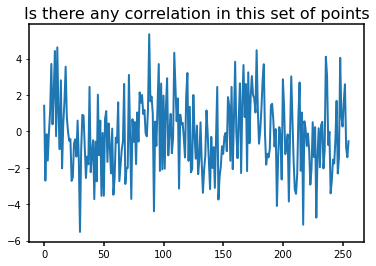

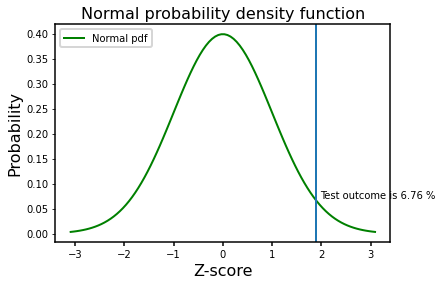

In [19]:
N = 256
noise_gain = 2
t = np.arange(N)
freq = 3/N
data = np.cos(2*np.pi*freq*t)
data = data + noise_gain * np.random.normal(size=N)
# Trying out Moran's I on a set of 1D data:
plt.figure()
plt.plot(data)
plt.title('Is there any correlation in this set of points')

# Starting from 0 matrix, then filling off-diagonal terms
Wm = np.zeros((N,N))
Wm[np.arange(N-1),1+np.arange(N-1)]=1
Wm[1+np.arange(N-1),np.arange(N-1)]=1
W=Wm.sum()

# Actual Moran I for the current case
c = data-data.mean()
MoranI=(N/W)*np.dot(c,np.dot(Wm,c))/np.sum(c**2)

# Expectation of Moran I for null hypothesis
E=-1/(N-1)

# Computing variance of Moran I under null hypothesis
S1=0.5*np.sum((Wm+Wm.T)**2)
S2=np.sum((Wm.sum(axis=0)+Wm.sum(axis=1))**2)
S3=sist.moment(data,moment=4)/sist.moment(data,moment=2)**2
S4=(N**2-3*N+3)*S1-N*S2+3*W**2
S5=(N**2-N)*S1-2*N*S2+6*W**2
V=(N*S4-S3*S5)/((N-1)*(N-2)*(N-3)*W**2) - E**2

# Now that we computed the expectation and variance, we can get the zscore
zscore = (MoranI-E)/np.sqrt(V)

# Let's choose a confidence threshold, by default, it is 0.05 (5%)
rejectionZ = 0.05

#Define pdf of normal distribution
x = np.linspace(sist.norm.ppf(0.001),
  sist.norm.ppf(0.999), 100)
normpdf=sist.norm.pdf(x)

#Compute probability that the outcome is coherent with null hypothesis
test=sist.norm.pdf(zscore)
print(f"Moran's I value is {MoranI}")
if (test<rejectionZ):
  print('Probability that null hypothesis is likely is '
        +str(test)+' instead of a minimum of '+str(rejectionZ)
        +' we decide to reject the null hypothesis: there is significand autocorrelation')
else:
  print('Probability that null hypothesis is likely is '
        +str(test)+' instead of a minimum of '+str(rejectionZ)
        +' we decide to accept the null hypothesis: there is no significand autocorrelation')

#Draw normal pdf
plt.figure(0)
plt.plot(x,normpdf,'g',label='Normal pdf')
plt.axvline(x=zscore)
plt.annotate('Test outcome is {0:.2f} %'.format(test*100), xy=(zscore, test), xytext=(zscore*1.05, test*1.05))
plt.legend()
plt.title("Normal probability density function")
plt.xlabel("Z-score")
plt.ylabel("Probability")

In [ ]:
# Moran's I on 2D data
def sliding_moran_from_patch(raster, mask, connect="4"):
    # moran's I from sliding window
    rows, cols = raster.shape
    kernel = np.ones((3, 3))
    kernel[1, 1] = 0
    if connect == "4":
        kernel[0, 0] = 0
        kernel[2, 2] = 0
        kernel[0, 2] = 0
        kernel[2, 0] = 0
    elif connect == "8":
        kernel[0, 0] = np.sqrt(2)
        kernel[2, 2] = np.sqrt(2)
        kernel[0, 2] = np.sqrt(2)
        kernel[2, 0] = np.sqrt(2)
    mean = np.nanmean(raster)
    raster_padded = np.pad(
        raster.astype(np.float),
        pad_width=((1, 1), (1, 1)),
        mode="constant",
        constant_values=np.nan,
    )
    rows_padded, cols_padded = raster_padded.shape
    sum_pix = np.zeros((rows, cols))
    weights_pix = np.zeros((rows, cols))
    for i in range(rows_padded - 2):
        for j in range(cols_padded - 2):
            center = raster_padded[i + 1, j + 1]
            if np.isfinite(center):
                neighbours = raster_padded[i : i + 3, j : j + 3]
                neighbours = neighbours[kernel == 1]
                neighbours = neighbours[np.isfinite(neighbours)]
                sum_pix[i, j] = np.sum(neighbours - mean) * (center - mean)
                weights_pix[i, j] = len(neighbours)
    moran = (
        np.sum(mask)
        / np.sum(weights_pix)
        * np.sum(sum_pix)
        / np.sum((raster[mask == 1] - mean) ** 2)
    )
    return moran


## Testing more complex statistical models alone

### Akaike information criterion

[From Wikipedia, the free encyclopedia:](https://en.wikipedia.org/wiki/Akaike_information_criterion)

#### Introduction - Field of application

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

Suppose that we have a statistical model of some data. Let $k$ be the number of estimated parameters in the model. Let $\hat{L}$ be the maximum value of the likelihood function for the model. Then the AIC value of the model is the following

\begin{align*}
  AIC = 2k-2 ln(\hat{L})
\end{align*}

Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. Thus, AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. The penalty discourages overfitting, because increasing the number of parameters in the model almost always improves the goodness of the fit.

AIC is founded in information theory. Suppose that the data is generated by some unknown process $f$. We consider two candidate models to represent $f$: $g_1$ and $g_2$. If we knew $f$, then we could find the information lost from using $g_1$ to represent $f$ by calculating the Kullback–Leibler divergence, $D_{KL}(f ‖ g_1)$; similarly, the information lost from using $g_2$ to represent $f$ could be found by calculating $D_{KL}(f ‖ g_2)$. We would then choose the candidate model that minimized the information loss.

We cannot choose with certainty, because we do not know f. Akaike showed, however, that we can estimate, via AIC, how much more (or less) information is lost by $g_1$ than by $g_2$. The estimate, though, is only valid asymptotically; if the number of data points is small, then some correction is often necessary (see AICc, below).

#### AICc

ICc is AIC with a correction for finite sample sizes. The formula for AICc depends upon the statistical model. Assuming that the model is univariate, linear, and has normally-distributed residuals (conditional upon regressors), the formula for AICc is as follows

\begin{align*}
  AICc =  AIC + \frac{2k (k+1)}{n-k-1}
\end{align*}

where n denotes the sample size and k denotes the number of parameters.

If the assumption of a univariate linear model with normal residuals does not hold, then the formula for AICc will generally change.
AICc is essentially AIC with a greater penalty for extra parameters. Using AIC, instead of AICc, when n is not many times larger than k2, increases the probability of selecting models that have too many parameters, i.e. of overfitting

#### Relative likelihood

To apply AIC in practice, we start with a set of candidate models, and then find the models' corresponding AIC values. There will almost always be information lost due to using a candidate model to represent the "true model" (i.e. the process that generates the data). We wish to select, from among the candidate models, the model that minimizes the information loss. We cannot choose with certainty, but we can minimize the estimated information loss.

Suppose that there are $R$ candidate models. Denote the AIC values of those models by $AIC_1, AIC_2, AIC_3, \dots , AIC_R$. Let $AIC_{min}$ be the minimum of those values. Then the quantity $exp^{\frac{AIC_{min} − AIC_i}{2}}$ can be interpreted as being proportional to the probability that the $i^{th}$ model minimizes the (estimated) information loss.

The quantity $e^{\frac{AIC_{min} − AIC_i}{2}}$ is known as the relative likelihood of model i.

As an example, suppose that there are three candidate models, whose AIC values are 100, 102, and 110. Then the second model is $exp^{\frac{100 − 102}{2}} = 0.368$ times as probable as the first model to minimize the information loss. Similarly, the third model is $exp^{\frac{100 − 110}{2}} = 0.007$ times as probable as the first model to minimize the information loss.

In this example, we would omit the third model from further consideration. We then have three options:

1. gather more data, in the hope that this will allow clearly distinguishing between the first two models
2. simply conclude that the data is insufficient to support selecting one model from among the first two
3. take a weighted average of the first two models, with weights proportional to 1 and 0.368, respectively, and then do statistical inference based on the weighted multimodel.

### Bayesian information criterion
[From Wikipedia, the free encyclopedia:](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

The BIC is formally defined as

\begin{align*}
  BIC &= ln(n)k - 2ln(\hat{L})
\end{align*}
where

* $\hat{L} =$ the maximized value of the likelihood function of the model $M$, i.e. $\hat{L} =p(x|\hat{\theta},M)$ 
where $\hat{\theta}$ are the parameter values that maximize the likelihood function;
* $x =$ the observed data
* $n =$ the number of data points in $x$, the number of observations, or equivalently, the sample size
* $k =$ the number of parameters estimated by the model. If the model under consideration is a multiple linear
regression, then the estimated parameters are the intercept, $q$ slope parameters and the constant variance of the
errors. Thus, $k=q+2$

The BIC is an asymptotic result derived under the assumptions that the data distribution is in an exponential family. That is, the integral of the likelihood function $p(x|\theta ,M)$ times the prior probability distribution $p(\theta |M)$ over the parameters $\theta$  of the model $M$ for fixed observed data $x$ is approximated as

\begin{align*}
  -2 \cdot \ln(p(x|M)) \approx BIC = -2\cdot ln(\hat{L}) + k \cdot (ln(n)-ln(2\pi))
\end{align*}

For large $n$, this can be approximated by the formula given above. The BIC is used in model selection problems where adding a constant to the BIC does not change the result.

## Testing model against each other (model selection)


### Bayes factor

#### Introduction

In statistics, the use of Bayes factors is a Bayesian version of classical method for model selection.

#### Bayes theorem, likelihood and model probability

The Bayes factor is a ratio of the likelihood probability of two competing hypothesis, usually a null and an alternative.

The posterior probability $P(M|D)$ of a model $M$ given data $D$ is given by Bayes' theorem:

\begin{align*}
  P(M|D) = \frac{P(D|M)P(M)}{P(D)}
\end{align*}

The data-dependent term $P(D|M)$ is a likelihood, and represents the probability that some data are produced under the assumption of this model, $M$ evaluating it correctly is the key to Bayesian model comparison.

Given a model selection problem in which we have to choose between two models on the basis of observed data $D$, the plausibility of the two different models $M_1$ and $M_2$, parametrized by model parameter vectors $\theta_{1}$  and $\theta_{2}$ is assessed by the Bayes factor $K$ given by

\begin{align*}
  K &= \frac{P(D|M_1)}{P(D|M_2)} \\
  &= \frac{\sum_{\theta_1} P(\theta_1|M_1)P(D|\theta_1,M_1)}{\sum_{\theta_2} P(\theta_2|M_2)P(D|\theta_2,M_2)} \\
  &= \frac{P(M_1|D)P(M_2)}{P(M_2|D)P(M_1)}
\end{align*}

#### Some more about the use of Bayes factor

If instead of the Bayes factor integral, the likelihood corresponding to the maximum likelihood estimate of the parameter for each statistical model is used, then the test becomes a classical likelihood-ratio test. Unlike a likelihood-ratio test, this Bayesian model comparison does not depend on any single set of parameters, as it integrates over all parameters in each model (with respect to the respective priors). However, an advantage of the use of Bayes factors is that it automatically, and quite naturally, includes a penalty for including too much model structure.

It thus guards against overfitting. For models where an explicit version of the likelihood is not available or too costly to evaluate numerically, approximate Bayesian computation (ABC) can be used.

## Hartigan's dip test of unimodality

This is not so well known, yet quite effective test of unimodality, especially very useful when someone want to try classification or outlier detection with GMM model, but doesn't really know what should be the best number of classes:
https://www.google.com/url?q=https://www.stat.washington.edu/wxs/Stat593-s03/Literature/hartigan85a.pdf&sa=D&source=hangouts&ust=1582727174008000&usg=AFQjCNF6tAF_nPFPBSJDmpRPCb1opMsH2Q
https://github.com/alimuldal/diptest

## Bayesian - a priori based A/B testing

This part is more or less a transcript/summary of this video: https://youtu.be/5f-9xCuyZh4?t=1703
Note: you will find almost the exact same example in the notebook: bayesian_ab_testing in this repo, which is a direct copy of [pymc example repo](https://github.com/pymc-devs/pymc-examples)
The author develops a very interesting A/B testing type of usecas, in which you are given two sets of monodimensional events:
* One set with ~15 values, that states for performances (or revenue) generated by a model, lets call it model A that is in production for the 3 last month
* A second set with ~5 values, that correspond to the same metrics/indices but was only tested over the past few days on a new model called model B.

You would like to know, if model B is significantly better than model A, although you might not have enough time to run a large scale experiment.

With such a low number of samples, most people would go for a T-Test. However, there is an underlying assumption with the T-test: the normal distribution of samples to be compared.
Given the large deviation in the data from the performances, we now that de distribution most likely is NOT normal but rather a flavour of heavy tailed distribution.

In [57]:
import pandas as pd
import pymc3 as pm
import arviz as az
import seaborn as sns

<AxesSubplot:xlabel='value', ylabel='Count'>

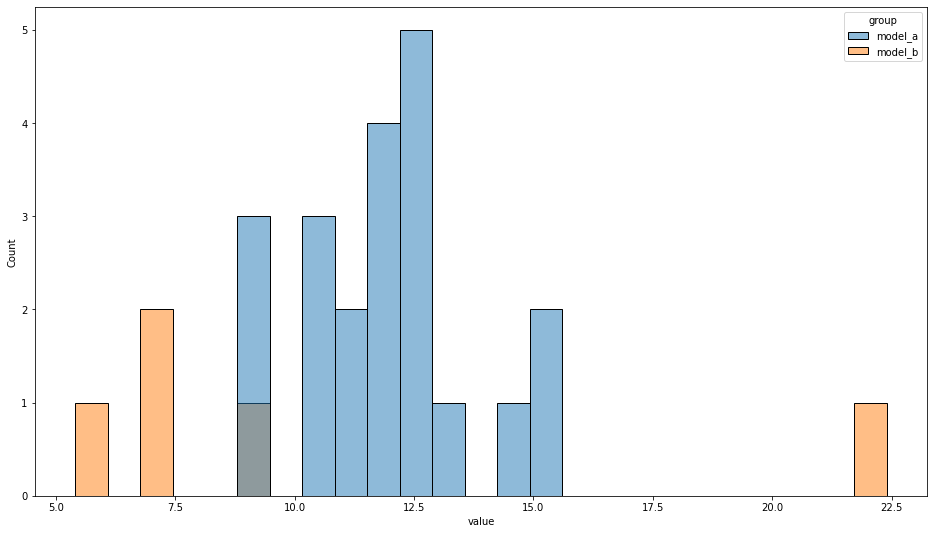

In [64]:
model_a = [10.4, 15.0, 9.1, 11.8, 14.3, 13.2, 10.7,
           9.3, 9.0, 15.2, 12.1, 12.3, 12.6, 11.8, 
           11.5, 12.3, 11.7, 12.8, 12.8, 10.9, 10.5]
model_b = [7.1, 8.9, 5.4, 6.8, 22.4]
y1 = np.array(model_a)
y2 = np.array(model_b)
y = pd.DataFrame({"value": np.r_[y1, y2],
                  "group": np.r_[["model_a"]*len(model_a), ["model_b"]*len(model_b)]})
fig, ax = plt.subplots(figsize=(16,9))
sns.histplot(data=y, x='value', hue='group', bins=25, common_bins=True, ax=ax)

In [30]:
mu_m = y.value.mean()
mu_s = y.value.std()

# We define our a-priori distribution for model parameters
with pm.Model() as model:
    model_a_mean = pm.Normal("model_a_mean", mu_m, sd=mu_s)
    model_b_mean = pm.Normal("model_b_mean", mu_m, sd=mu_s)
sigma_low = 1
sigma_high = 10
with model:
    model_a_std = pm.Uniform("model_a_std", lower=sigma_low, upper=sigma_high)
    model_b_std = pm.Uniform("model_b_std", lower=sigma_low, upper=sigma_high)
with model:
    # The smaller the v-1 parameter, the further away we are from normal, and the more weight in the tail
    v = pm.Exponential("v_minus_one", 1/29) + 1

In [31]:
# Now we define our model itself, a distribution type (student) with a distribution for each of its parameters
with model:
    # We choose student distribution because it is heavy tailed
    model_a = pm.StudentT("model_a", nu=v, mu=model_a_mean, sd=model_a_std, observed=y1)
    model_a = pm.StudentT("model_b", nu=v, mu=model_b_mean, sd=model_b_std, observed=y2)
with model:
    diff_of_means = pm.Deterministic("Difference of means", model_a_mean-model_b_mean)

In [32]:
# Now sample with default sampler
with model:
    trace = pm.sample()
trace_df = pm.trace_to_dataframe(trace)

<ipython-input-32-d559977dd2aa>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v_minus_one, model_b_std, model_a_std, model_b_mean, model_a_mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/home/gnthibault/.local/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'model_a_mean'}>,
        <AxesSubplot:title={'center':'model_a_mean'}>],
       [<AxesSubplot:title={'center':'model_b_mean'}>,
        <AxesSubplot:title={'center':'model_b_mean'}>]], dtype=object)

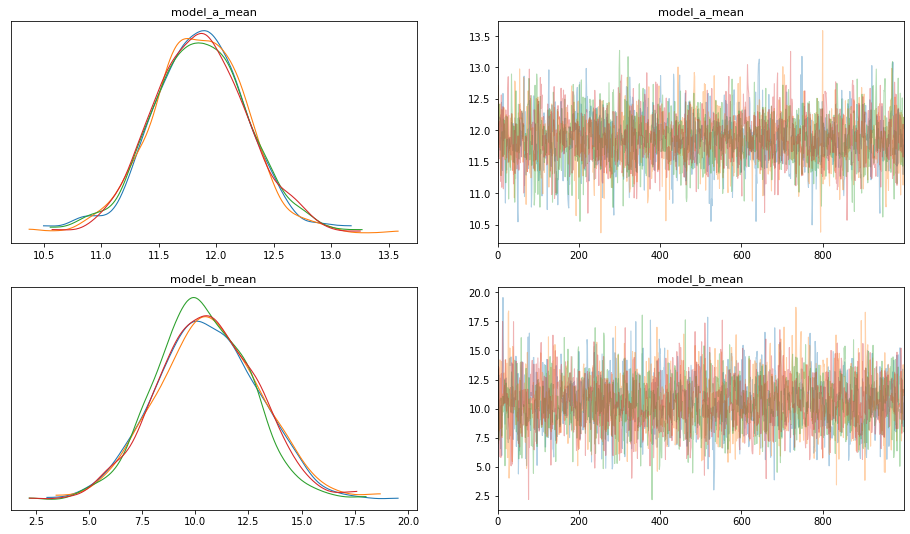

In [70]:
az.plot_trace(trace, var_names=['model_a_mean', 'model_b_mean'], combined=False, compact=False, figsize = (16, 9))

In [36]:
trace_df

,model_a_mean,model_b_mean,model_a_std,model_b_std,v_minus_one,Difference of means
0,11.818062,11.762530,1.726938,6.016108,8.319572,0.055532
1,11.960553,9.054880,2.332725,6.000219,64.108112,2.905674
2,11.815308,12.733813,2.180258,9.175203,7.318251,-0.918505
3,11.902827,12.875410,2.128196,9.235138,8.672125,-0.972582
4,11.775277,12.613210,2.646118,8.043160,9.009499,-0.837933
...,...,...,...,...,...,...
3995,11.719900,7.878901,1.833413,7.685332,18.028334,3.840999
3996,11.930343,12.473653,1.640210,9.571353,49.754715,-0.543311
3997,12.094927,11.387792,1.642561,8.738745,23.570464,0.707135
3998,11.573419,11.638284,1.626920,7.740096,30.714741,-0.064865


<AxesSubplot:ylabel='Frequency'>

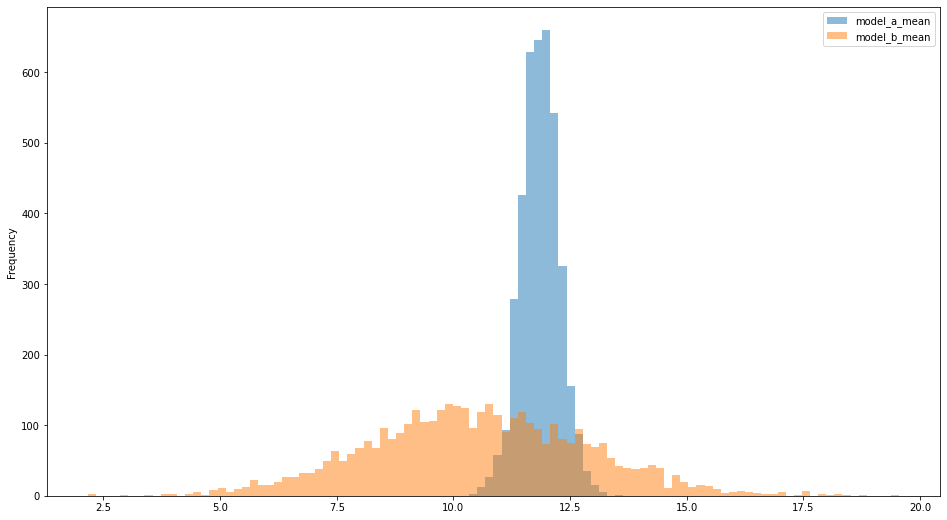

In [35]:
# Show posterior distribution for model_a and model_b means
#help(trace)
fig, ax = plt.subplots(figsize=(16,9))
trace_df[["model_a_mean", "model_b_mean"]].plot.hist(bins=100, ax=ax, alpha=0.5)

Probability of model b being better than model a is 0.72


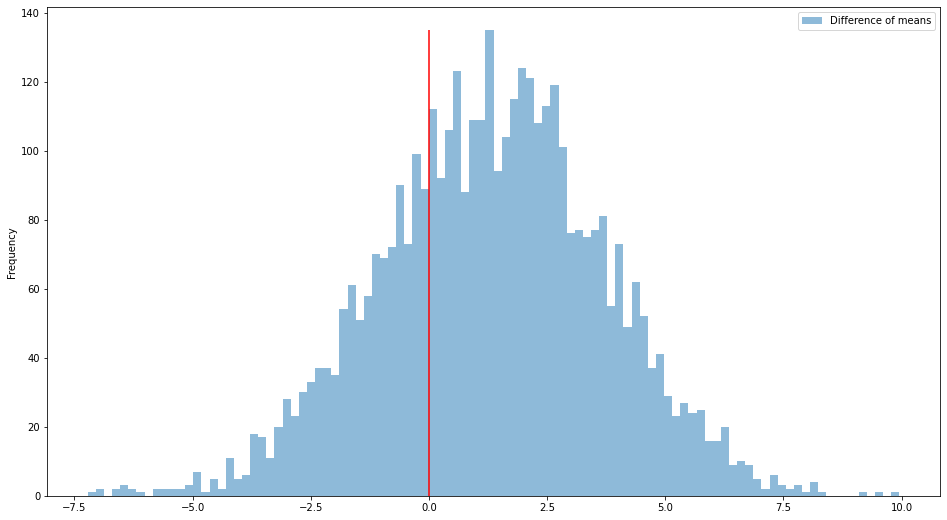

In [47]:
# Now show posterior distribution of model_a better than model b
fig, ax = plt.subplots(figsize=(16,9))
n_bins = 100
ymin = 0
ymax = pd.cut(trace_df['Difference of means'], n_bins).value_counts().max()
ax.vlines(x=0, ymin=ymin, ymax=ymax, color="red")
trace_df[["Difference of means"]].plot.hist(bins=n_bins, ax=ax, alpha=0.5)

# Compute the probability of model b being better than mode a
prob_success = pd.Series(trace_df['Difference of means']>0).sum() / trace_df.shape[0]
print(f"Probability of model b being better than model a is {prob_success:.2f}")